### Import libraries and dataset

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

### load data(digits dataset)

In [2]:
digits = load_digits()

### features

In [3]:
X = digits.data

### Target/Output/Classes

In [4]:
y = digits.target

### To know about how well our model is making prediction,we should have some testing or unseen data

#### split data into training and testing set

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.10,random_state=0)

### Import model and instantiate model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)

### Train model with training data

In [8]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### make Prediction on testing data

In [9]:
pred = knn.predict(X_test)

### find accuracy

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)
#knn.score(X_test,y_test)

0.9888888888888889

In [11]:
digits.data.shape

(1797, 64)

<Figure size 432x288 with 0 Axes>

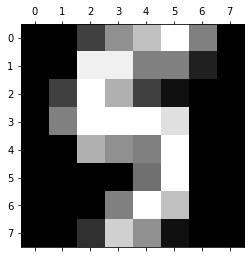

In [12]:
test = 1700


import pylab as pl
pl.gray()
pl.matshow(digits.images[test])
pl.show()

In [13]:

knn.predict(digits.data[test].reshape(1,-1))

array([5])

In [14]:
test = digits.data[1700]
#print test.shape
test = test.reshape(1,-1)
#print test.shape
knn.predict(test)

array([5])

In [15]:
## find value of k

In [16]:
y_pred=knn.predict(X_test)

In [17]:
np.mean(y_pred != y_test)

0.011111111111111112

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test,y_pred)

0.9888888888888889

In [20]:
import pickle 
knnPickle = open('knn_file', 'wb') 

In [21]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pickle.dump(knn, knnPickle)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

In [22]:
error_rate

[0.011111111111111112,
 0.016666666666666666,
 0.005555555555555556,
 0.027777777777777776,
 0.027777777777777776,
 0.03333333333333333,
 0.027777777777777776,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.027777777777777776,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.027777777777777776,
 0.027777777777777776,
 0.03333333333333333,
 0.03333333333333333,
 0.044444444444444446,
 0.05,
 0.05,
 0.05,
 0.05,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446]

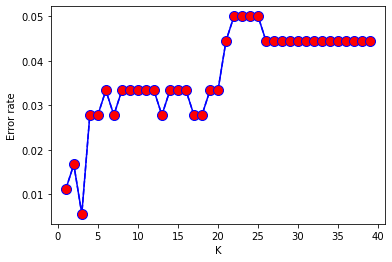

In [23]:
#plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue')
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred_new = knn.predict(X_test)
print(accuracy_score(y_test,pred_new))
print(np.mean(pred_new != y_test))

0.9944444444444445
0.005555555555555556


In [25]:
np.where(y_test!=pred_new)

(array([122], dtype=int64),)

In [26]:
loaded_model = pickle.load(open('knn_file', 'rb'))
result = loaded_model.predict(X_test) 

In [29]:
result.size

180

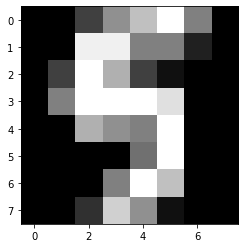

In [35]:
plt.imshow(digits.images[1700],cmap='gray')
plt.show()